# Data processing

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os

In [3]:
sz = 128

# Initialising our first Convolution network model 

In [5]:
classifier = Sequential() 

In [6]:
# First convolution network and pooling


# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())


# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2



In [7]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [8]:
from keras.preprocessing.image import ImageDataGenerator


In [42]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

sz=128


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('ProcessedData128/train',
                                                 target_size=(sz, sz),
                                                 batch_size=24,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('ProcessedData128/test',
                                            target_size=(sz , sz),
                                            batch_size=27,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [44]:
classifier.fit(
        training_set,
        epochs=20,
        verbose=1, 
        validation_data=test_set,
)# No of images in test set

Epoch 1/20
27/27 [==============================] - 4s 151ms/step - loss: 0.3126 - accuracy: 0.9090 - val_loss: 0.1144 - val_accuracy: 0.9753
Epoch 2/20
27/27 [==============================] - 5s 167ms/step - loss: 0.2081 - accuracy: 0.9367 - val_loss: 0.0716 - val_accuracy: 0.9815
Epoch 3/20
27/27 [==============================] - 4s 138ms/step - loss: 0.2281 - accuracy: 0.9367 - val_loss: 0.1254 - val_accuracy: 0.9753
Epoch 4/20
27/27 [==============================] - 4s 132ms/step - loss: 0.2254 - accuracy: 0.9321 - val_loss: 0.0735 - val_accuracy: 0.9877
Epoch 5/20
27/27 [==============================] - 4s 133ms/step - loss: 0.2392 - accuracy: 0.9136 - val_loss: 0.0444 - val_accuracy: 0.9877
Epoch 6/20
27/27 [==============================] - 4s 133ms/step - loss: 0.2439 - accuracy: 0.9275 - val_loss: 0.0988 - val_accuracy: 0.9753
Epoch 7/20
27/27 [==============================] - 4s 132ms/step - loss: 0.2215 - accuracy: 0.9213 - val_loss: 0.0639 - val_accuracy: 0.9877
Epoch 

In [45]:
classifier.evaluate(test_set)

6/6 [==============================] - 0s 32ms/step - loss: 0.0704 - accuracy: 0.9753


[0.07035290449857712, 0.9753086566925049]

In [11]:
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/models/SignDetection.h5' 
classifier.save(path)

# Loading saved model

In [46]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

sz=128


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('ProcessedData128/train',
                                                 target_size=(sz, sz),
                                                 batch_size=24,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('ProcessedData128/test',
                                            target_size=(sz , sz),
                                            batch_size=27,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [47]:
from tensorflow.keras.models import load_model
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/models/SignDetection.h5' 


savedModel=load_model(path)

In [48]:
savedModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [49]:
savedModel.evaluate(test_set)

7/7 [==============================] - 0s 22ms/step - loss: 0.0536 - accuracy: 0.9816


[0.053587112575769424, 0.9815950989723206]

# Let us predict our output and visualise it

In [10]:
import tensorflow as tf
from tensorflow import keras


test_path = 'ProcessedData128/test' 
train_path = 'ProcessedData128/train'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(128,128), class_mode='categorical', batch_size=27,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(128,128), class_mode='categorical', batch_size=27, shuffle=True)

Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [18]:
import numpy as np

imgs, labels = next(train_batches)
train_labels = list(train_batches.class_indices)

# the labels is giving me the acccurate position of the image from 24 
print(len(labels))
position = np.argmax(labels[1])
print(position+1)
print(train_labels[position])

27
25
Y


In [84]:
#Plotting the images...
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt # for showing images

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(40, 40))

def plotImages(images_arr,accurate_labels,predicted_labels):
    fig, axes = plt.subplots(len(images_arr) // 4, 4, figsize=(20,20))
    axes = axes.flatten()
    
    for img, ax, label1,label2 in zip(images_arr, axes, accurate_labels,predicted_labels):
        ax.imshow(img)
        ax.set_title(f'accurate sign {label1} \n predicted sign {label2}')
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()



# plotImages(imgs)
# print(imgs.shape)
# print(labels)

<Figure size 4000x4000 with 0 Axes>

In [21]:
classifier.fit(
        train_batches,
        epochs=20,
        verbose=1, 
        validation_data=test_batches,
)# No of images in test set

Epoch 1/20


24/24 [==============================] - 8s 217ms/step - loss: 39.4584 - accuracy: 0.0602 - val_loss: 3.2709 - val_accuracy: 0.1111
Epoch 2/20
24/24 [==============================] - 4s 156ms/step - loss: 3.0831 - accuracy: 0.1481 - val_loss: 1.9987 - val_accuracy: 0.5617
Epoch 3/20
24/24 [==============================] - 4s 180ms/step - loss: 2.0955 - accuracy: 0.4043 - val_loss: 1.1664 - val_accuracy: 0.8086
Epoch 4/20
24/24 [==============================] - 5s 204ms/step - loss: 1.4492 - accuracy: 0.5725 - val_loss: 0.7129 - val_accuracy: 0.8395
Epoch 5/20
24/24 [==============================] - 7s 282ms/step - loss: 1.0640 - accuracy: 0.7022 - val_loss: 0.5173 - val_accuracy: 0.9198
Epoch 6/20
24/24 [==============================] - 4s 167ms/step - loss: 0.8423 - accuracy: 0.7824 - val_loss: 0.4452 - val_accuracy: 0.9198
Epoch 7/20
24/24 [==============================] - 4s 168ms/step - loss: 0.7446 - accuracy: 0.8025 - val_loss: 0.3758 - val_accuracy: 0.9568
Epo

In [22]:
imgs, labels = next(test_batches)

In [24]:
scores = classifier.evaluate(imgs, labels, verbose=0)

In [31]:
scores

[0.09666424989700317, 0.9629629850387573]

In [28]:
classifier.save('best_model_dataflair3.h5')

In [36]:
predictions = classifier.predict(imgs, verbose=0)
print(len(predictions))

27


In [71]:

word_dict = list(train_batches.class_indices)
# plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

Actual labels
M   B   K   A   D   Q   J   D   S   H   B   B   N   E   Q   X   Y   P   S   G   X   D   T   R   A   J   U   

Actual labels
M   B   K   A   D   Q   J   D   S   H   B   B   N   E   Q   X   Y   P   S   G   X   D   T   R   A   J   U   
predicted labels
M   B   K   A   D   Q   J   D   S   C   B   B   N   E   Q   X   Y   P   S   G   X   D   T   R   A   J   U   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

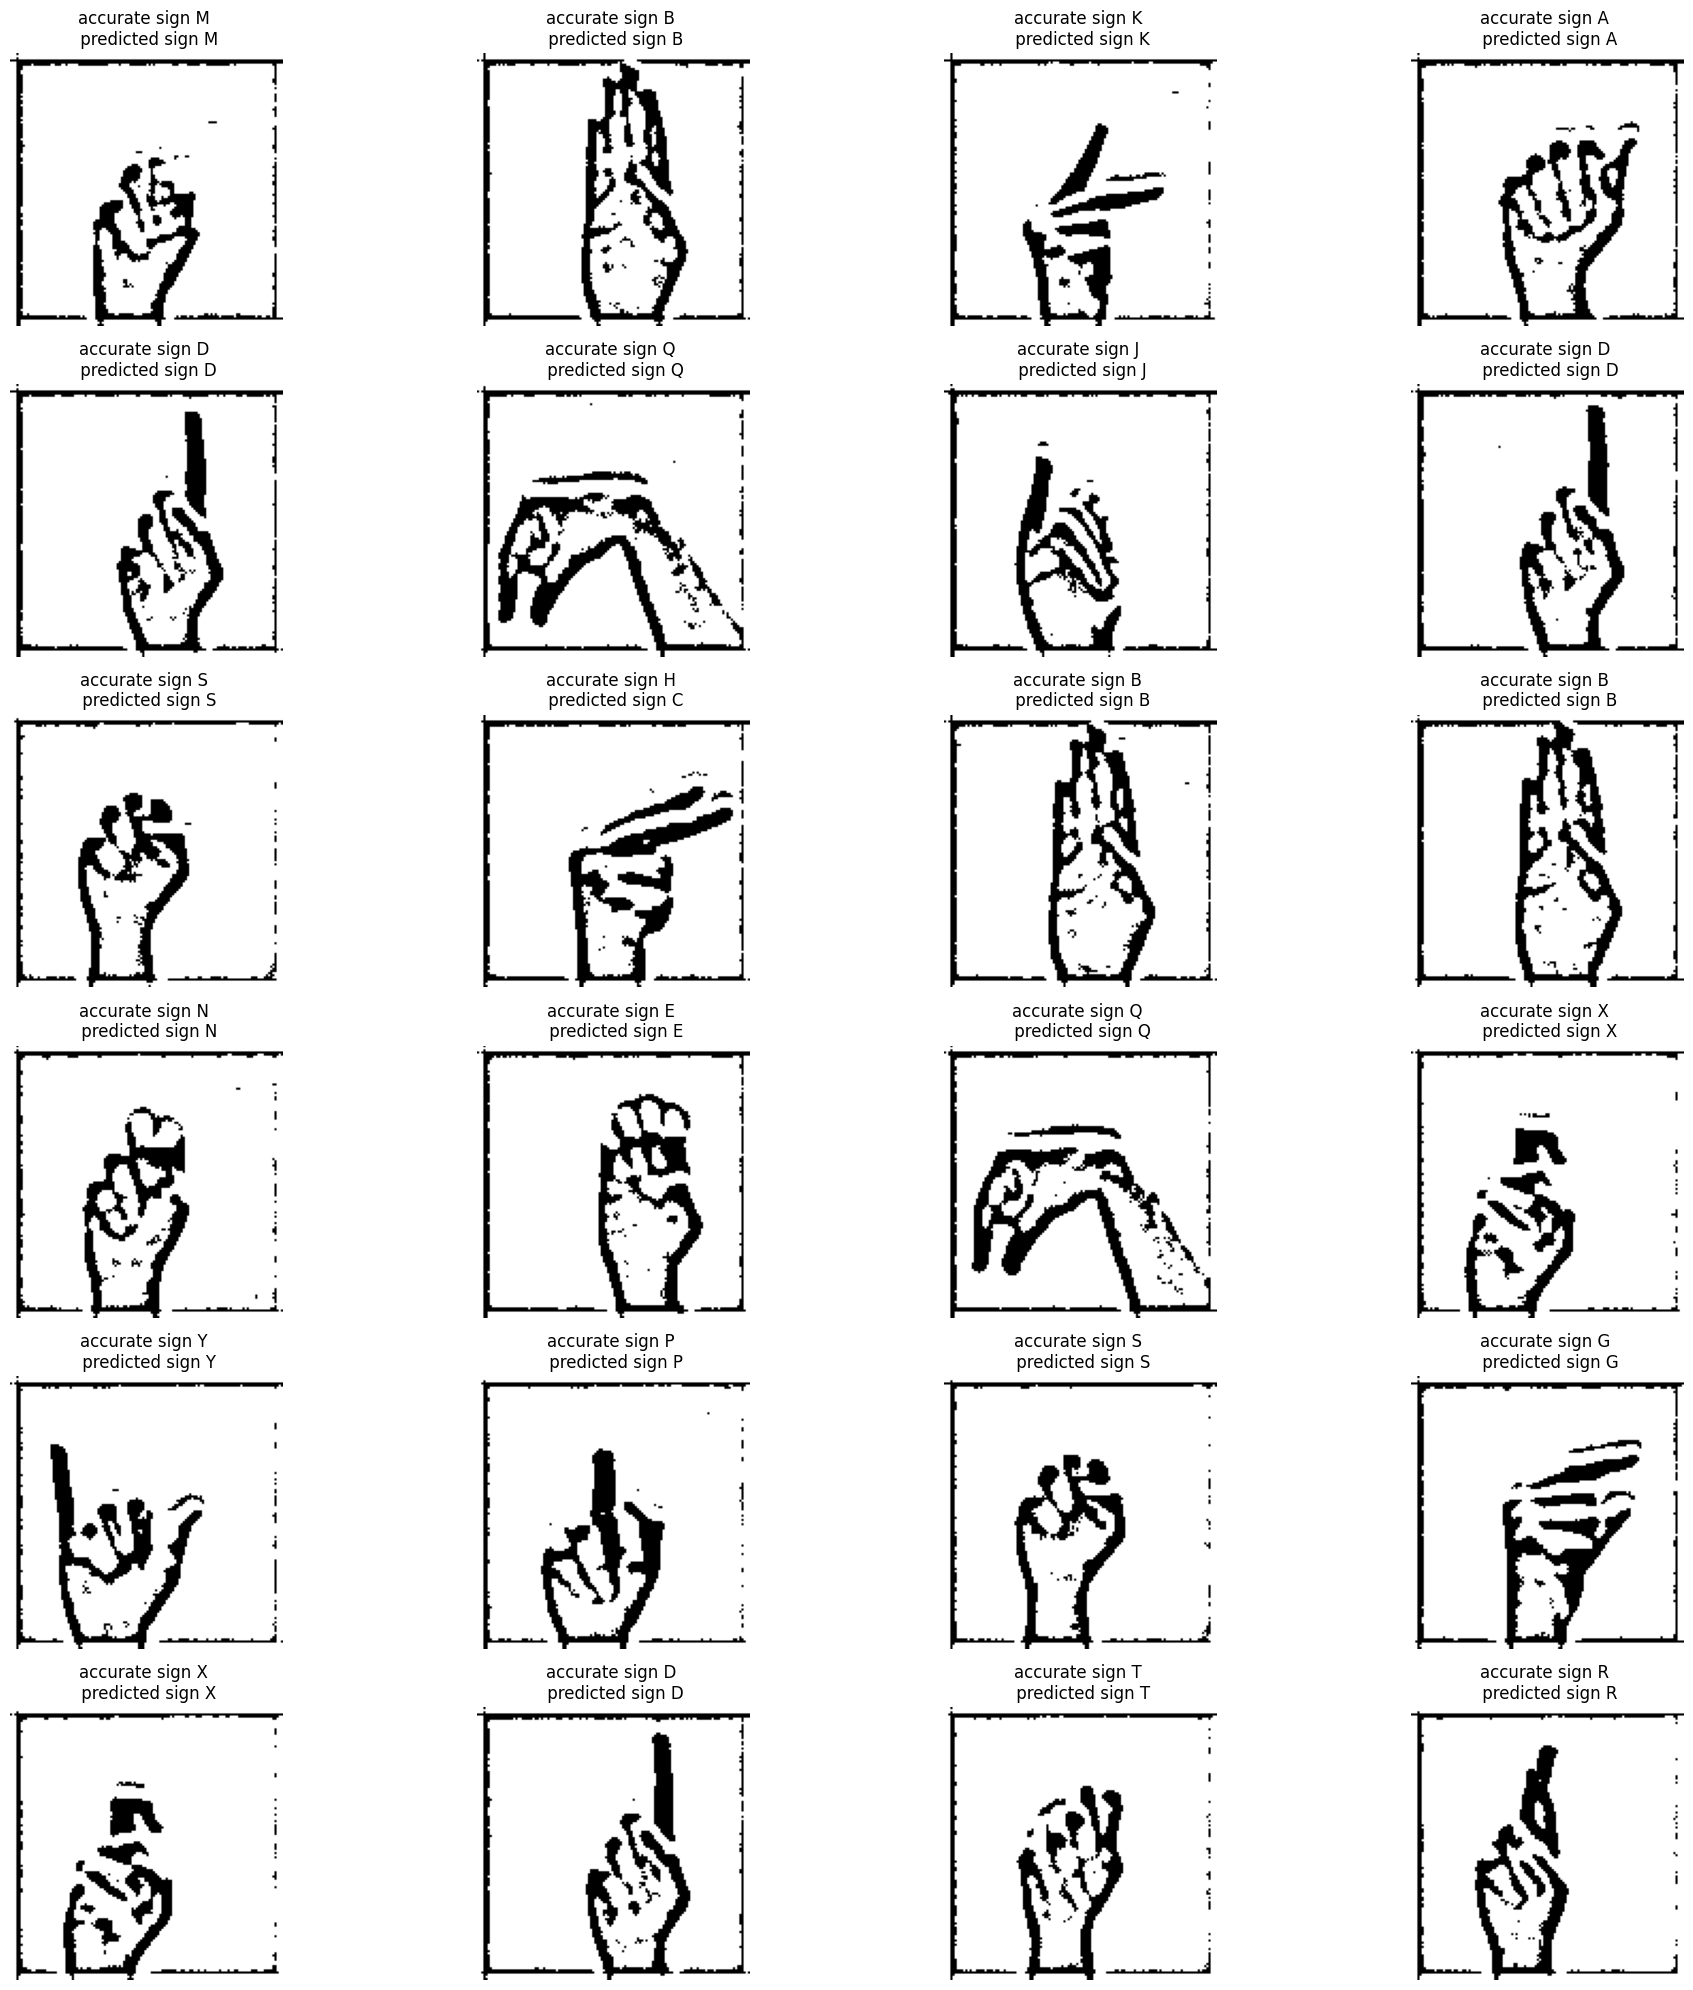

In [85]:
print('Actual labels')
accurate_labels = []
for i in labels:
    print(word_dict[np.argmax(i)], end='   ') 
    val = word_dict[np.argmax(i)] 
    accurate_labels.append(val) 


print()
predicted_labels=[]
print('predicted labels')
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
    val1 = word_dict[np.argmax(i)] 
    predicted_labels.append(val1)

print() 
plotImages(imgs,accurate_labels,predicted_labels)



https://www.bing.com/images/search?view=detailV2&ccid=FlofrkqO&id=DE4B6131A0DD1D2567E5CFC56399762CD76E68C0&thid=OIP.FlofrkqOZkAhVPo_3hR0BgAAAA&mediaurl=https%3a%2f%2fi.pinimg.com%2foriginals%2f94%2f3f%2f07%2f943f0756b6c97710359be270e1432ac9.jpg&exph=710&expw=474&q=sign+language+image&simid=608001678586611371&FORM=IRPRST&ck=E1E438F170C0CCAB35CEF2391D0A4C50&selectedIndex=15&itb=0&ajaxhist=0&ajaxserp=0

In [87]:
classifier.save('best_model_dataflair13.h5')